In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv("USA_Housing.csv")

In [7]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
data = data.drop(['Address'],axis=1)

In [10]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


# Data Preprocessing

AttributeError: module 'matplotlib.pyplot' has no attribute 'sns'

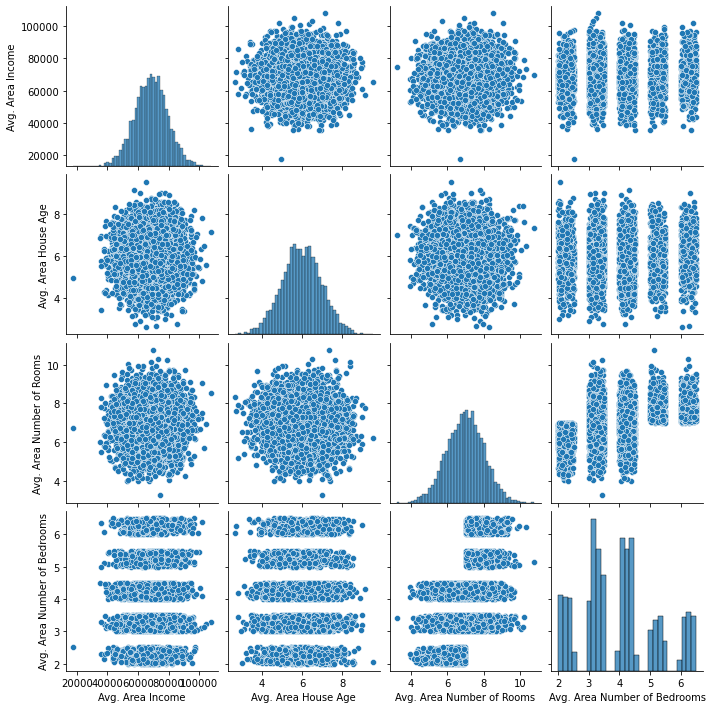

In [11]:
sns.pairplot(data[['Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']])
plt.sns

In [12]:
x = data.drop(['Price'],axis=1)
y = data['Price']

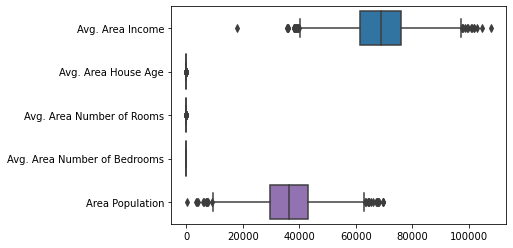

In [13]:
sns.boxplot(data = x,orient = 'h')
plt.show()

In [14]:
def checkOutlier(data,col):
    X=data[col].copy()
    q3=X.quantile(0.75)
    q1=X.quantile(0.25)
    iqr=q3-q1
    for idx,entry in enumerate(data[col]):
        if (entry>q3+1.5*iqr):
            data.loc[idx,col]=q3+1.5*iqr
        elif (entry<q1-1.5*iqr):
            data.loc[idx,col]=q1-1.5*iqr
    return X[(X>q3+1.5*iqr)|(X<q1-1.5*iqr)]
    
for col in x:
    checkOutlier(x,col)

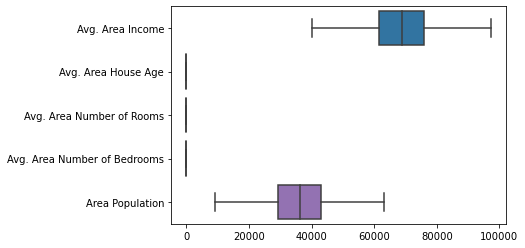

In [15]:
sns.boxplot(data=x,orient='h')
plt.show()

In [16]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [17]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [19]:
x_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [20]:
y_train

3186    1.209798e+06
632     1.048818e+06
577     1.006545e+06
2406    1.315568e+06
4686    1.641750e+06
            ...     
2895    1.063206e+06
2763    8.732420e+05
905     1.345963e+06
3980    1.270928e+06
235     1.039107e+06
Name: Price, Length: 3750, dtype: float64

In [21]:
cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train.loc[:,cols] = sc.fit_transform(x_train[cols])
x_test.loc[:,cols] = sc.fit_transform(x_test[cols])

# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

10805999430.135305
0.9183653059858657


In [25]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
1179,1.022409e+06,1.103593e+06
932,1.766248e+06,1.780544e+06
792,9.490722e+05,1.150569e+06
1185,1.437154e+06,1.443870e+06
759,1.205963e+06,1.647568e+06


# Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=200)
rf_reg.fit(x_train, y_train)
y_pred_rf = rf_reg.predict(x_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_rf))
print(r2_score(y_test,y_pred_rf))

14560796397.915522
0.8899994242799014


In [28]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_rf)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
1179,1.022409e+06,1.104396e+06
932,1.766248e+06,1.714637e+06
792,9.490722e+05,1.154021e+06
1185,1.437154e+06,1.385556e+06
759,1.205963e+06,1.583756e+06


# KNN Regressor

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test,y_pred_knn))
print(r2_score(y_test,y_pred_knn))

16536446166.699713
0.8750742370821288


In [32]:
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred_knn)
table = pd.concat([y_test, y_pred], axis=1)
table = table.dropna()
table.columns = ['Actual Price','Predicted Price']
table.head()

,Actual Price,Predicted Price
1179,1.022409e+06,1.100354e+06
932,1.766248e+06,1.703196e+06
792,9.490722e+05,1.205481e+06
1185,1.437154e+06,1.401230e+06
759,1.205963e+06,1.630070e+06
